### This notebook explores three of the four hypothesis of our project

Hypothesis 1: Warmer States(within the US) have lesser cases of COVID-19<br/>
Hypothesis 2: The states with higher population will have higher spread of COVID-19 as compared to states with lower population<br/> 
Hypothesis 3: State with higher number of COVID-19 cases should have more number of Corona-caused death numbers<br/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp  
import shapefile as shp 
import seaborn as sns

### Classification into hot, cold and moderate
The data that we used to classify the states into 3 categories(hot,cold and moderate) has been taken from this link :https://www.currentresults.com/Weather/US/average-annual-state-temperatures.php . We went throough a numer of research papers and research videos to study temperature classifications in the US, then decided to use the following labels for the classification: <br/>
• hot for average temperature > 60 °F <br/>
• moderate for average temperature 50°F ~ 60 °F<br/>
• cold for average temperature < 50 °F

In [2]:
population_usa = pd.read_csv("Data/USA_STATEWISE_POPULATION.csv")
cases = pd.read_csv("Data/us-states.csv")
temperature = pd.read_csv('https://raw.githubusercontent.com/srishtirawat29/final_project_2020Sp/master/final_project_2020Sp-master/Data/State_Temp.csv')


In [3]:
#Renaming column in file temperatures
temperature.rename(columns={'State Name':'state'},inplace=True)
temperature

,state,type
0,Alabama,Hot
1,Alaska,Cold
2,Arizona,Hot
3,Arkansas,Hot
4,California,Moderate
5,Colorado,Cold
6,Connecticut,Cold
7,Delaware,Moderate
8,Florida,Hot
9,Georgia,Hot


In [4]:
cases['date'] = pd.to_datetime(cases['date']) #converting to datetime data type
#casesnew is a new data frame
casesnew = cases[cases.groupby('state').date.transform('max') == cases['date']] #using group by on state column and returned latest number of cases by date
casesnew.head()

,date,state,fips,cases,deaths
49,2020-05-01,Alabama,1,7294,289
100,2020-05-01,Alaska,2,362,7
197,2020-05-01,Arizona,4,7962,330
249,2020-05-01,Arkansas,5,3310,64
347,2020-05-01,California,6,52318,2147


In [5]:
#merging two dataframes - casenew and population_usa
mergeddf = population_usa.merge(casesnew, left_on='NAME', right_on='state')
mergeddf.head()

,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS,date,state,fips,cases,deaths
0,Alabama,4903185,3814879,77.8,2020-05-01,Alabama,1,7294,289
1,Alaska,731545,551562,75.4,2020-05-01,Alaska,2,362,7
2,Arizona,7278717,5638481,77.5,2020-05-01,Arizona,4,7962,330
3,Arkansas,3017804,2317649,76.8,2020-05-01,Arkansas,5,3310,64
4,California,39512223,30617582,77.5,2020-05-01,California,6,52318,2147


In [6]:
#Keeping only the relevant columns
mergeddf = mergeddf [['date','state','POPESTIMATE2019', 'cases', 'deaths']]
mergeddf.head()

,date,state,POPESTIMATE2019,cases,deaths
0,2020-05-01,Alabama,4903185,7294,289
1,2020-05-01,Alaska,731545,362,7
2,2020-05-01,Arizona,7278717,7962,330
3,2020-05-01,Arkansas,3017804,3310,64
4,2020-05-01,California,39512223,52318,2147


### Calculating 3 new variables:
•Cases Per Capita<br/>
•Deaths Per Capita<br/>
•Death_Percentage

In [7]:
#Main Formula
mergeddf ['Cases Per Capita'] = mergeddf['cases']/mergeddf['POPESTIMATE2019']
mergeddf ['Deaths Per Capita'] = mergeddf['deaths']/mergeddf['POPESTIMATE2019']
mergeddf ['Death_Percentage'] = mergeddf['deaths']/mergeddf['cases']*100 
mergeddf.round({'Cases Per Capita': 2, 'Deaths Per Capita':2} )
mergeddf.head()

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,Deaths Per Capita,Death_Percentage
0,2020-05-01,Alabama,4903185,7294,289,0.001488,0.000059,3.962161
1,2020-05-01,Alaska,731545,362,7,0.000495,0.000010,1.933702
2,2020-05-01,Arizona,7278717,7962,330,0.001094,0.000045,4.144687
3,2020-05-01,Arkansas,3017804,3310,64,0.001097,0.000021,1.933535
4,2020-05-01,California,39512223,52318,2147,0.001324,0.000054,4.103750


In [8]:
#Sorting in descending order by Cases Per Capita and Death_Percentage
mergeddf.sort_values(by=['Cases Per Capita', 'Death_Percentage'],ascending=False)
mergeddf

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,Deaths Per Capita,Death_Percentage
0,2020-05-01,Alabama,4903185,7294,289,0.001488,0.000059,3.962161
1,2020-05-01,Alaska,731545,362,7,0.000495,0.000010,1.933702
2,2020-05-01,Arizona,7278717,7962,330,0.001094,0.000045,4.144687
3,2020-05-01,Arkansas,3017804,3310,64,0.001097,0.000021,1.933535
4,2020-05-01,California,39512223,52318,2147,0.001324,0.000054,4.103750
5,2020-05-01,Colorado,5758736,15661,818,0.002720,0.000142,5.223166
6,2020-05-01,Connecticut,3565287,28764,2339,0.008068,0.000656,8.131692
7,2020-05-01,Delaware,973764,4918,159,0.005051,0.000163,3.233022
8,2020-05-01,District of Columbia,705749,4658,231,0.006600,0.000327,4.959210
9,2020-05-01,Florida,21477737,34720,1313,0.001617,0.000061,3.781682


Text(0.5, 1.0, 'Figure')

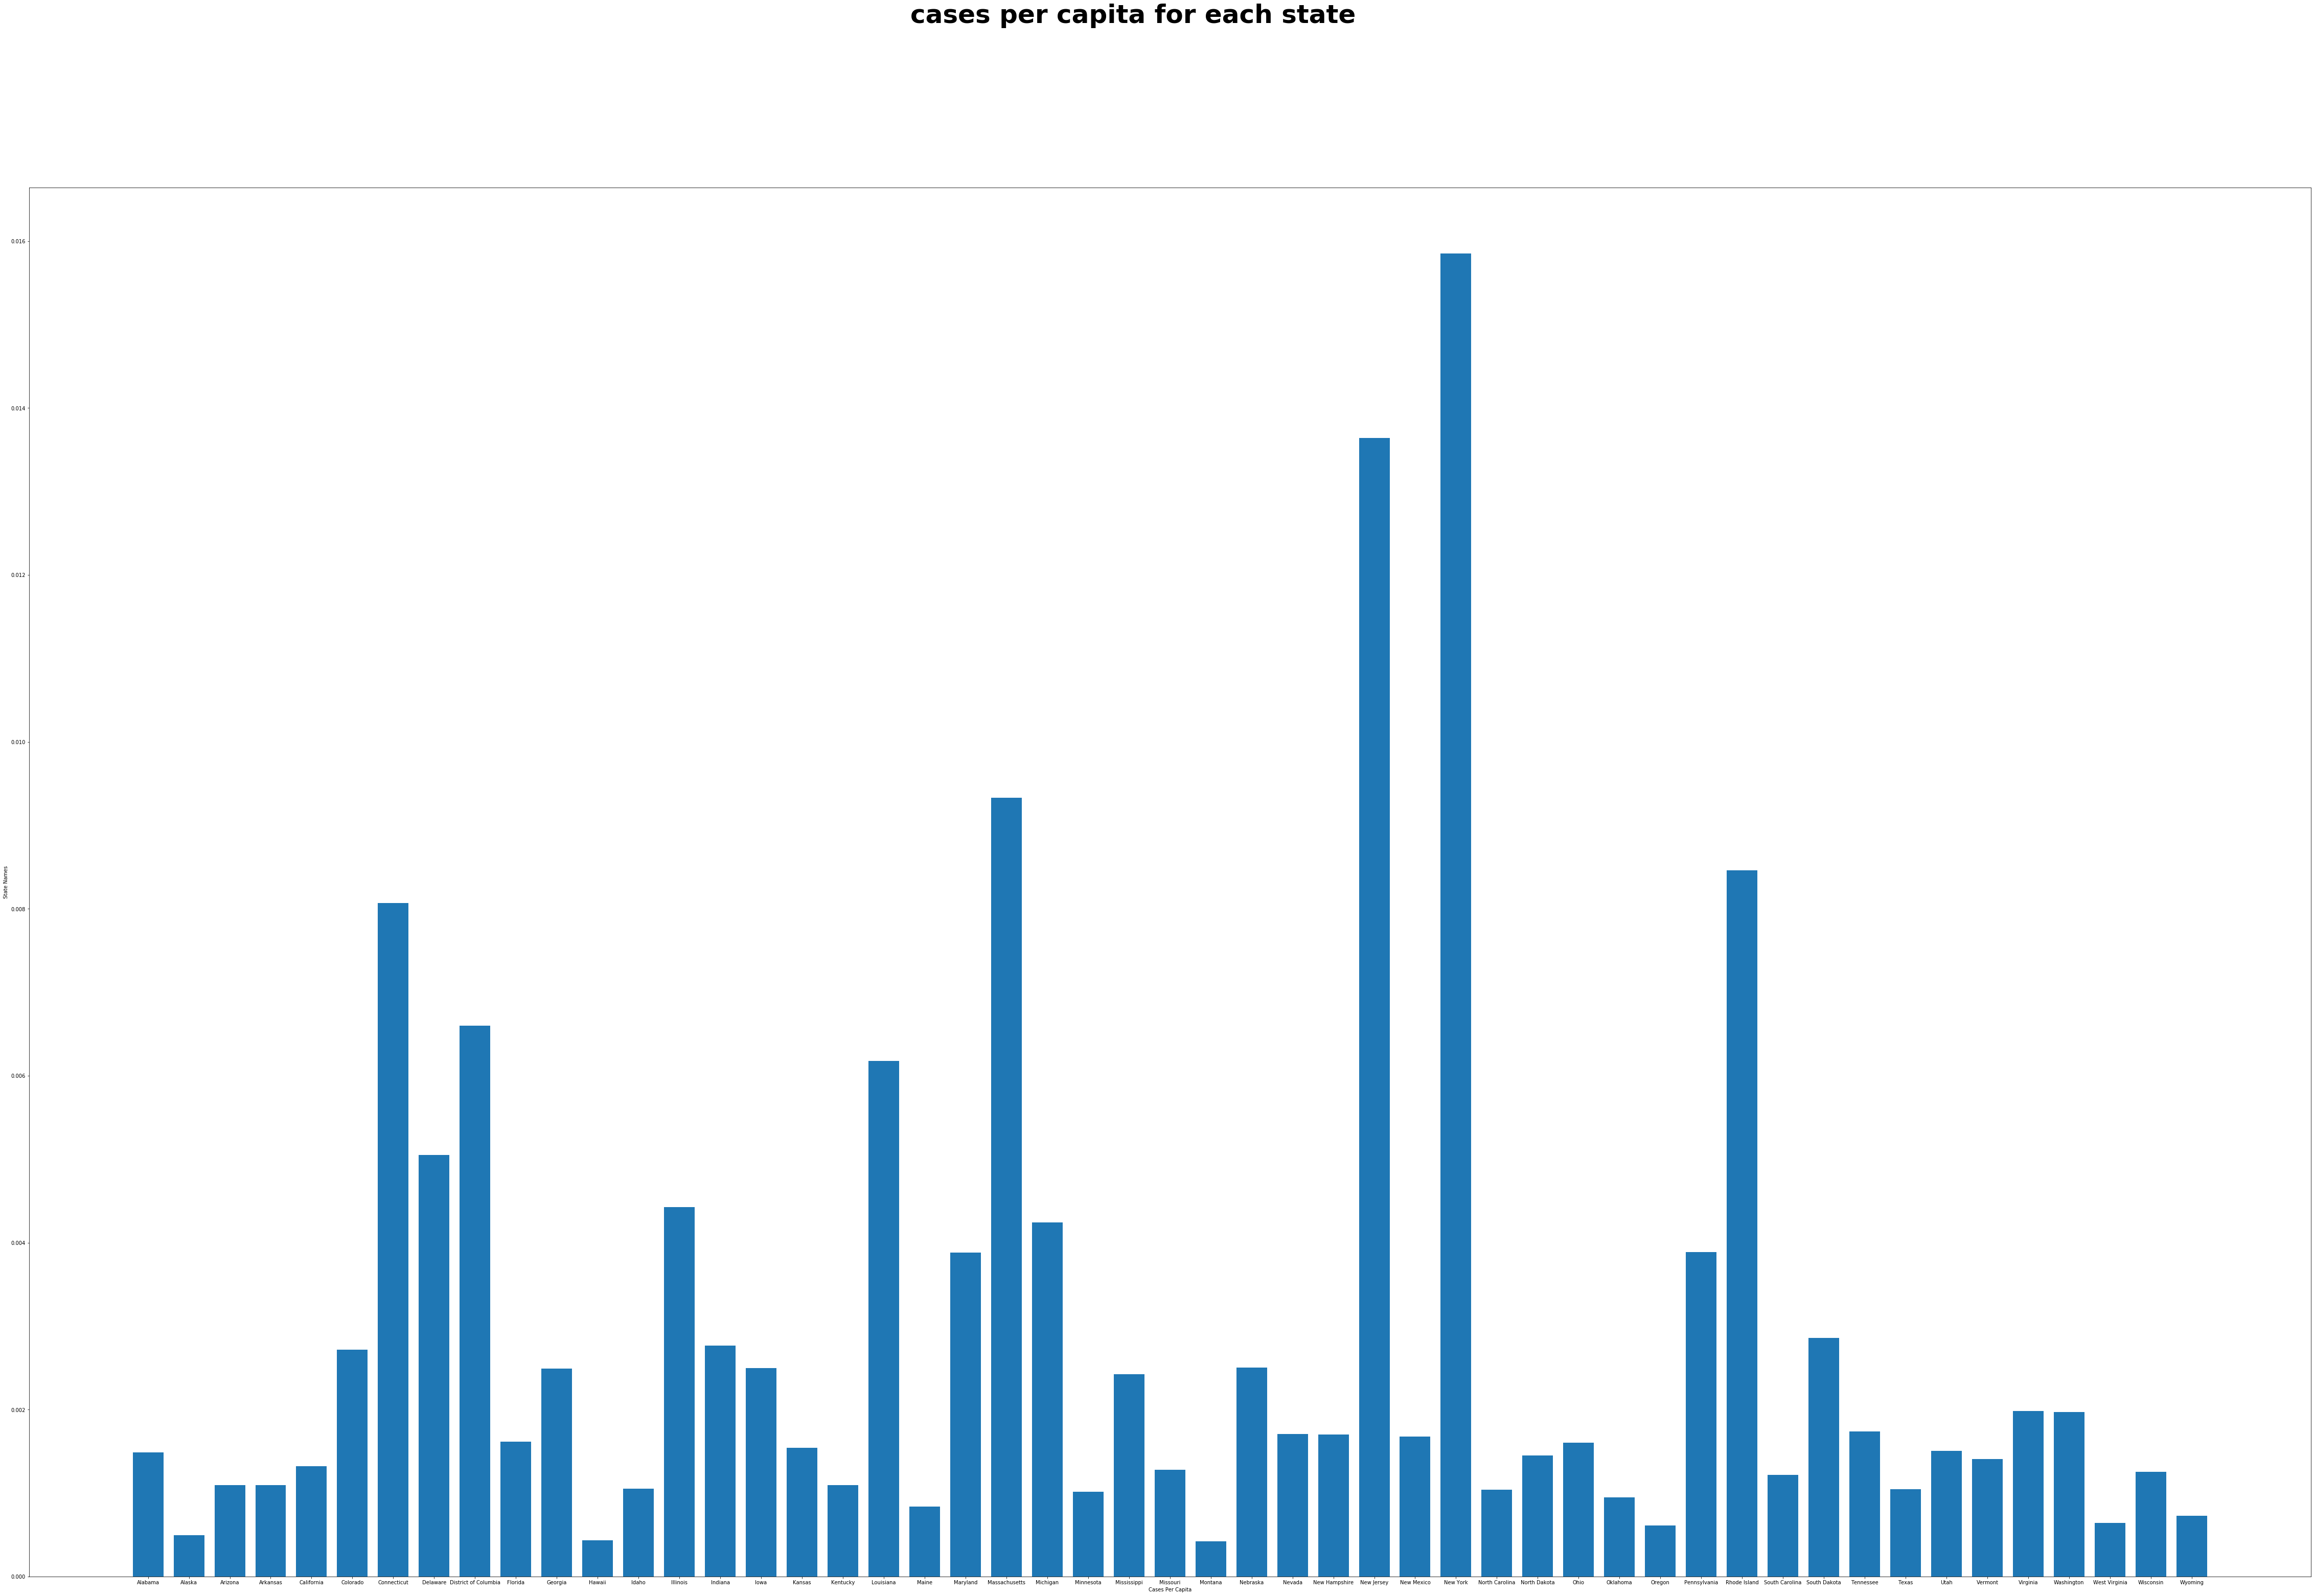

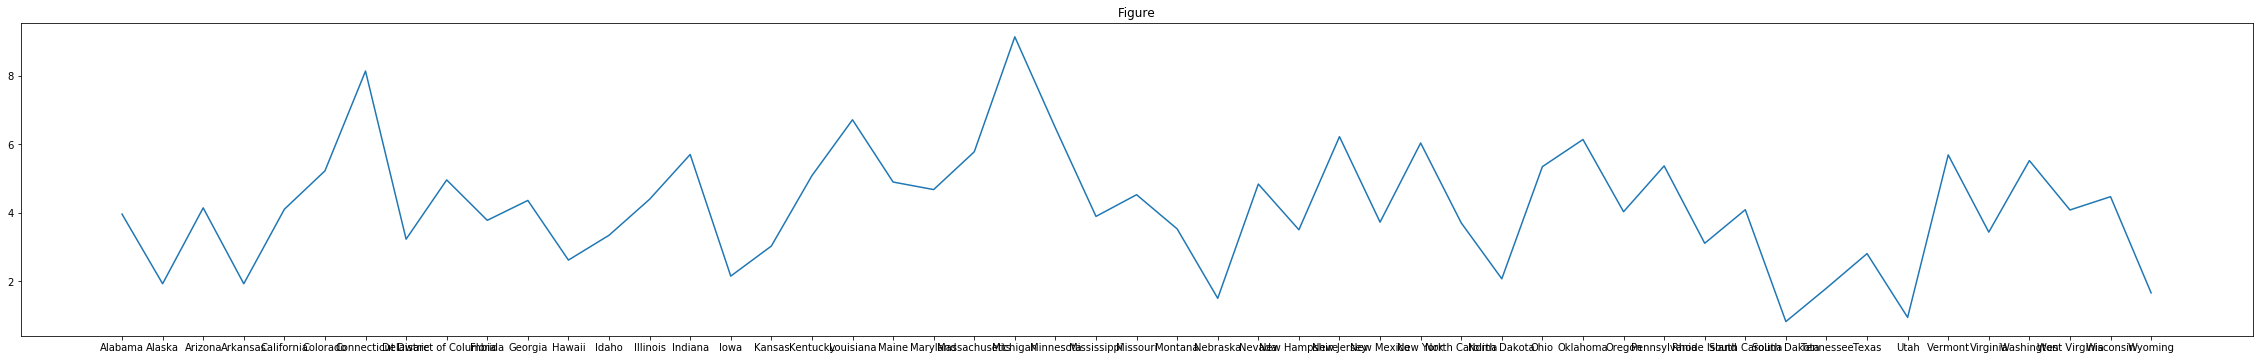

In [9]:
#Plotting bar graph for cases per capita Vs States
fig, ax = plt.subplots(1, figsize=(80, 50))
fig.suptitle('cases per capita for each state', fontsize=50, fontweight='bold')


ax.bar(mergeddf['state'], mergeddf['Cases Per Capita'],width = 0.75)
ax.set_xlabel('Cases Per Capita')
ax.set_ylabel('State Names')


variable = mergeddf['Death_Percentage']
fig, ax = plt.subplots(1, figsize=(40, 6))
ax.plot(mergeddf['state'], variable)


fig.subplots_adjust(top=0.85)
ax.set_title('Figure')

## Hypothesis 1
### Statement: Warmer States (within the US) have lesser cases of COVID-19

In [10]:
#Merging two dataframes - temp and mergeddf
hypothesis1_df = pd.merge(temperature, mergeddf)
hypothesis1_df.set_index ('state')
hypothesis1_df

,state,type,date,POPESTIMATE2019,cases,deaths,Cases Per Capita,Deaths Per Capita,Death_Percentage
0,Alabama,Hot,2020-05-01,4903185,7294,289,0.001488,0.000059,3.962161
1,Alaska,Cold,2020-05-01,731545,362,7,0.000495,0.000010,1.933702
2,Arizona,Hot,2020-05-01,7278717,7962,330,0.001094,0.000045,4.144687
3,Arkansas,Hot,2020-05-01,3017804,3310,64,0.001097,0.000021,1.933535
4,California,Moderate,2020-05-01,39512223,52318,2147,0.001324,0.000054,4.103750
5,Colorado,Cold,2020-05-01,5758736,15661,818,0.002720,0.000142,5.223166
6,Connecticut,Cold,2020-05-01,3565287,28764,2339,0.008068,0.000656,8.131692
7,Delaware,Moderate,2020-05-01,973764,4918,159,0.005051,0.000163,3.233022
8,Florida,Hot,2020-05-01,21477737,34720,1313,0.001617,0.000061,3.781682
9,Georgia,Hot,2020-05-01,10617423,26436,1153,0.002490,0.000109,4.361477


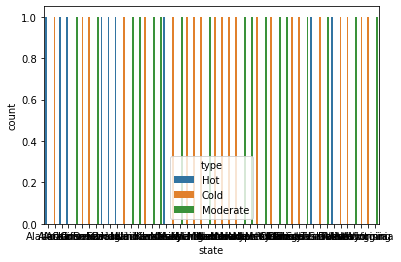

In [11]:
sns.countplot(x = 'state' , data = hypothesis1_df, hue = 'type')

In [12]:
#Key oberservations for Hypothesis 1
hypo1_top_10_casespercapita = hypothesis1_df.nlargest(10, 'Cases Per Capita')
hypo1_top_10_casespercapita

,state,type,date,POPESTIMATE2019,cases,deaths,Cases Per Capita,Deaths Per Capita,Death_Percentage
30,New York,Cold,2020-05-01,19453561,308345,18610,0.015850,0.000957,6.035447
28,New Jersey,Moderate,2020-05-01,8882190,121190,7538,0.013644,0.000849,6.219985
20,Massachusetts,Cold,2020-05-01,6892503,64311,3716,0.009331,0.000539,5.778172
37,Rhode Island,Moderate,2020-05-01,1059361,8962,279,0.008460,0.000263,3.113144
6,Connecticut,Cold,2020-05-01,3565287,28764,2339,0.008068,0.000656,8.131692
17,Louisiana,Hot,2020-05-01,4648794,28711,1927,0.006176,0.000415,6.711713
7,Delaware,Moderate,2020-05-01,973764,4918,159,0.005051,0.000163,3.233022
12,Illinois,Moderate,2020-05-01,12671821,56055,2464,0.004424,0.000194,4.395683
21,Michigan,Cold,2020-05-01,9986857,42348,3866,0.004240,0.000387,9.129121
36,Pennsylvania,Cold,2020-05-01,12801989,49764,2671,0.003887,0.000209,5.367334


Text(0, 0.5, 'State Names')

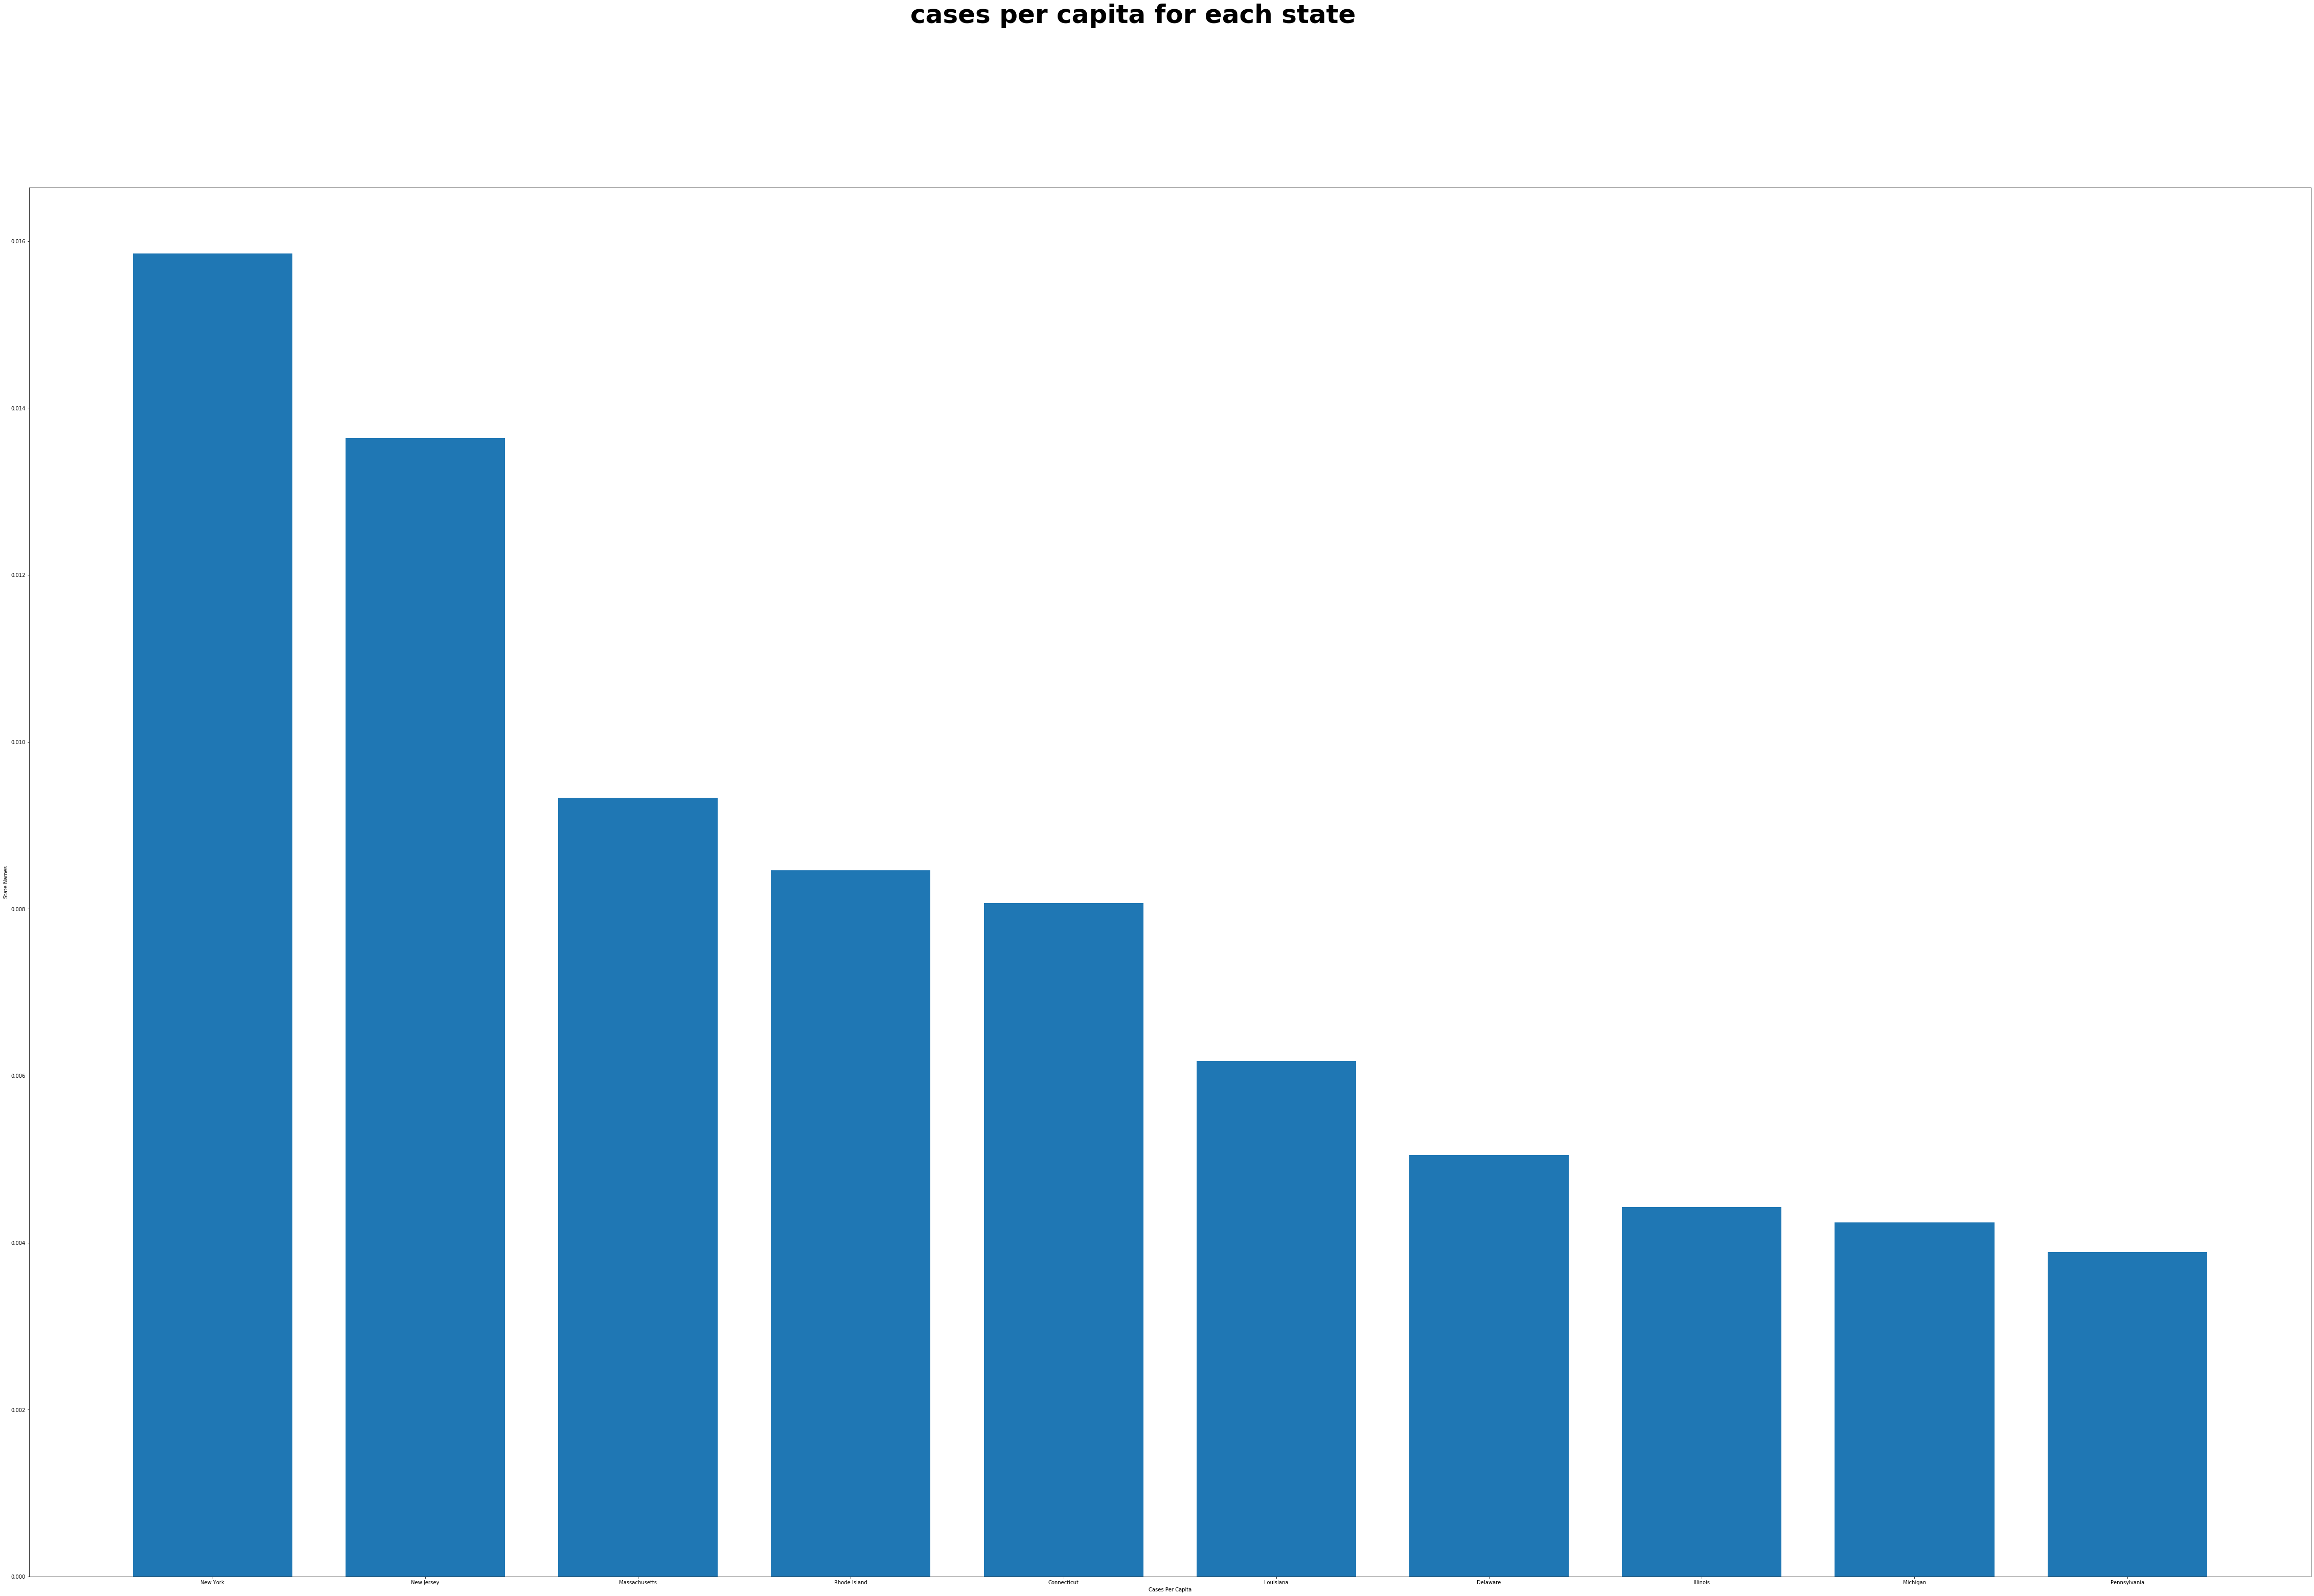

In [13]:
#Plotting Cases per capita for each state

fig, ax = plt.subplots(1, figsize=(80, 50))
fig.suptitle('cases per capita for each state', fontsize=50, fontweight='bold')


ax.bar(hypo1_top_10_casespercapita['state'], hypo1_top_10_casespercapita['Cases Per Capita'], width = 0.75)
ax.set_xlabel('Cases Per Capita')
ax.set_ylabel('State Names')

### From the Graph we can see that the top 10 states with highest cases are as follows:
New York Cold <br/>
New Jersey Moderate <br/>
Massachusetts Cold <br/>
Rhode Island Moderate <br/>
Connecticut Cold <br/>
Louisiana Hot <br/>
Delaware Moderate <br/>
Illinois Moderate <br/>
Michigan Cold <br/>
Pennsylvania Cold <br/>

Only 1 of the top 10 states with the highest per capita cases of COVID-19 falls under <font color='red'> 'hot' </font> category. <br/> Hence we can safely make an observation that regions with hoter average temperature have lesser number of cases and states with colder average temprature have higher cases of COVID-19; i.e there is a correlation between temprature and spread of the corona virus.

## Hypothesis 2:
### Statement: The states with higher population will have higher spread of COVID-19 as compared to states with lower population

In [14]:
#Display the top 10 states with highest population
top_10_population = mergeddf.nlargest(10, 'POPESTIMATE2019')
top_10_population

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,Deaths Per Capita,Death_Percentage
4,2020-05-01,California,39512223,52318,2147,0.001324,0.000054,4.103750
43,2020-05-01,Texas,28995881,30339,853,0.001046,0.000029,2.811563
9,2020-05-01,Florida,21477737,34720,1313,0.001617,0.000061,3.781682
32,2020-05-01,New York,19453561,308345,18610,0.015850,0.000957,6.035447
38,2020-05-01,Pennsylvania,12801989,49764,2671,0.003887,0.000209,5.367334
13,2020-05-01,Illinois,12671821,56055,2464,0.004424,0.000194,4.395683
35,2020-05-01,Ohio,11689100,18743,1002,0.001603,0.000086,5.345996
10,2020-05-01,Georgia,10617423,26436,1153,0.002490,0.000109,4.361477
33,2020-05-01,North Carolina,10488084,10922,405,0.001041,0.000039,3.708112
22,2020-05-01,Michigan,9986857,42348,3866,0.004240,0.000387,9.129121


In [15]:
#Display the top 10 states with highest cases per capita
top_10_casespercapita = mergeddf.nlargest(10, 'Cases Per Capita')
top_10_casespercapita

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,Deaths Per Capita,Death_Percentage
32,2020-05-01,New York,19453561,308345,18610,0.015850,0.000957,6.035447
30,2020-05-01,New Jersey,8882190,121190,7538,0.013644,0.000849,6.219985
21,2020-05-01,Massachusetts,6892503,64311,3716,0.009331,0.000539,5.778172
39,2020-05-01,Rhode Island,1059361,8962,279,0.008460,0.000263,3.113144
6,2020-05-01,Connecticut,3565287,28764,2339,0.008068,0.000656,8.131692
8,2020-05-01,District of Columbia,705749,4658,231,0.006600,0.000327,4.959210
18,2020-05-01,Louisiana,4648794,28711,1927,0.006176,0.000415,6.711713
7,2020-05-01,Delaware,973764,4918,159,0.005051,0.000163,3.233022
13,2020-05-01,Illinois,12671821,56055,2464,0.004424,0.000194,4.395683
22,2020-05-01,Michigan,9986857,42348,3866,0.004240,0.000387,9.129121


In [16]:
hypothesis2_df = pd.merge(top_10_population, top_10_casespercapita,how = 'inner')
hypothesis2_df

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,Deaths Per Capita,Death_Percentage
0,2020-05-01,New York,19453561,308345,18610,0.015850,0.000957,6.035447
1,2020-05-01,Illinois,12671821,56055,2464,0.004424,0.000194,4.395683
2,2020-05-01,Michigan,9986857,42348,3866,0.004240,0.000387,9.129121


In [17]:
#Multilying column cases with 10 to record the changes in number of cases graphically
hypothesis2_df['cases_normalized'] = hypothesis2_df['cases']*10
hypothesis2_df

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,Deaths Per Capita,Death_Percentage,cases_normalized
0,2020-05-01,New York,19453561,308345,18610,0.015850,0.000957,6.035447,3083450
1,2020-05-01,Illinois,12671821,56055,2464,0.004424,0.000194,4.395683,560550
2,2020-05-01,Michigan,9986857,42348,3866,0.004240,0.000387,9.129121,423480


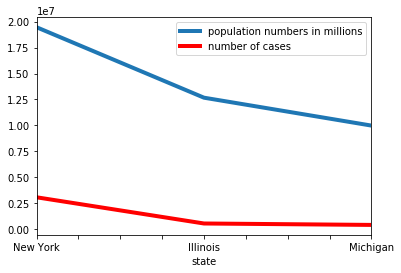

In [18]:
#Plotting population numbers and  
ax = plt.gca()

hypothesis2_df.plot(kind='line',x='state',y='POPESTIMATE2019',label ='population numbers in millions' ,ax=ax, linewidth = 4)
hypothesis2_df.plot(kind='line',x='state',y='cases_normalized', label ='number of cases', color='red', ax=ax, linewidth = 4)

plt.show()

### Observation:
#### From our data, we found that only 3 out of the top 10 states were common among the two dataframes, i.e. only 3 out of 10 states had both higher population and higher per capita cases. Given this fact, we can say that there doesn't seem a clear correlation between the population of the state and community spread of COVID-19. Thus, our hypothesis was proved wrong.



## Hypothesis 3
### Statement: State with higher number of COVID-19 cases should have more number of Corona-caused death numbers

In [19]:
#List of states in desceding order of cases per capita and death percentage

mergeddf.sort_values(by=['Cases Per Capita', 'Death_Percentage'],ascending=False)

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,Deaths Per Capita,Death_Percentage
32,2020-05-01,New York,19453561,308345,18610,0.015850,0.000957,6.035447
30,2020-05-01,New Jersey,8882190,121190,7538,0.013644,0.000849,6.219985
21,2020-05-01,Massachusetts,6892503,64311,3716,0.009331,0.000539,5.778172
39,2020-05-01,Rhode Island,1059361,8962,279,0.008460,0.000263,3.113144
6,2020-05-01,Connecticut,3565287,28764,2339,0.008068,0.000656,8.131692
8,2020-05-01,District of Columbia,705749,4658,231,0.006600,0.000327,4.959210
18,2020-05-01,Louisiana,4648794,28711,1927,0.006176,0.000415,6.711713
7,2020-05-01,Delaware,973764,4918,159,0.005051,0.000163,3.233022
13,2020-05-01,Illinois,12671821,56055,2464,0.004424,0.000194,4.395683
22,2020-05-01,Michigan,9986857,42348,3866,0.004240,0.000387,9.129121


In [20]:
#List of top 10 states with highest death percentage from corona-caused deaths
top_10_deaths = mergeddf.nlargest(10, 'Death_Percentage')
top_10_deaths

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,Deaths Per Capita,Death_Percentage
22,2020-05-01,Michigan,9986857,42348,3866,0.004240,0.000387,9.129121
6,2020-05-01,Connecticut,3565287,28764,2339,0.008068,0.000656,8.131692
18,2020-05-01,Louisiana,4648794,28711,1927,0.006176,0.000415,6.711713
23,2020-05-01,Minnesota,5639632,5730,371,0.001016,0.000066,6.474695
30,2020-05-01,New Jersey,8882190,121190,7538,0.013644,0.000849,6.219985
36,2020-05-01,Oklahoma,3956971,3748,230,0.000947,0.000058,6.136606
32,2020-05-01,New York,19453561,308345,18610,0.015850,0.000957,6.035447
21,2020-05-01,Massachusetts,6892503,64311,3716,0.009331,0.000539,5.778172
14,2020-05-01,Indiana,6732219,18630,1062,0.002767,0.000158,5.700483
45,2020-05-01,Vermont,623989,879,50,0.001409,0.000080,5.688282


In [21]:
#Display the top 10 states with highest cases per capita
top_10_casespercapita = mergeddf.nlargest(10, 'Cases Per Capita')
top_10_casespercapita

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,Deaths Per Capita,Death_Percentage
32,2020-05-01,New York,19453561,308345,18610,0.015850,0.000957,6.035447
30,2020-05-01,New Jersey,8882190,121190,7538,0.013644,0.000849,6.219985
21,2020-05-01,Massachusetts,6892503,64311,3716,0.009331,0.000539,5.778172
39,2020-05-01,Rhode Island,1059361,8962,279,0.008460,0.000263,3.113144
6,2020-05-01,Connecticut,3565287,28764,2339,0.008068,0.000656,8.131692
8,2020-05-01,District of Columbia,705749,4658,231,0.006600,0.000327,4.959210
18,2020-05-01,Louisiana,4648794,28711,1927,0.006176,0.000415,6.711713
7,2020-05-01,Delaware,973764,4918,159,0.005051,0.000163,3.233022
13,2020-05-01,Illinois,12671821,56055,2464,0.004424,0.000194,4.395683
22,2020-05-01,Michigan,9986857,42348,3866,0.004240,0.000387,9.129121


In [22]:
#Finding the common states from the 2 dataframes - top_10_deaths and top_10_casespercapita
hypothesis3_df = pd.merge(top_10_deaths, top_10_casespercapita,how = 'inner')
hypothesis3_df

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,Deaths Per Capita,Death_Percentage
0,2020-05-01,Michigan,9986857,42348,3866,0.004240,0.000387,9.129121
1,2020-05-01,Connecticut,3565287,28764,2339,0.008068,0.000656,8.131692
2,2020-05-01,Louisiana,4648794,28711,1927,0.006176,0.000415,6.711713
3,2020-05-01,New Jersey,8882190,121190,7538,0.013644,0.000849,6.219985
4,2020-05-01,New York,19453561,308345,18610,0.015850,0.000957,6.035447
5,2020-05-01,Massachusetts,6892503,64311,3716,0.009331,0.000539,5.778172


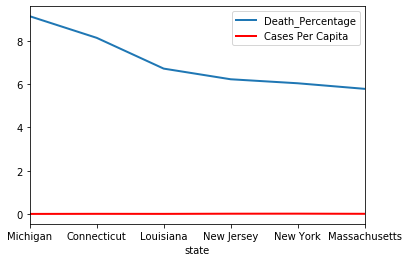

In [23]:
#Plotting Death Percentage and Cases Per Capita against States with highest cases per capita and deaths percentage
ax = plt.gca()

hypothesis3_df.plot(kind='line',x='state',y='Death_Percentage',ax=ax, linewidth = 2)
hypothesis3_df.plot(kind='line',x='state',y='Cases Per Capita', color='red', ax=ax, linewidth = 2)

plt.show()

### Observation:
#### From our data, we found that 6 out of the top 10 states were common among the two dataframes, i.e. 6 out of 10 states had both higher death percentage and higher per capita cases. Given this fact, we can say that there seems to be a correlation between the death percentage and number of cases of COVID-19 in a state where these deaths were caused by corona virus. Thus, our hypothesis was proven correct.


### Choropleth map of COVID-19 cases by state within USA

In [24]:
shapefile = 'Data/cb_2018_us_state_500k.shp'
gdf = gp.read_file(shapefile)[['NAME', 'STUSPS','geometry']]

gdf.head()

,NAME,STUSPS,geometry
0,Mississippi,MS,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,North Carolina,NC,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,Oklahoma,OK,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,Virginia,VA,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,West Virginia,WV,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


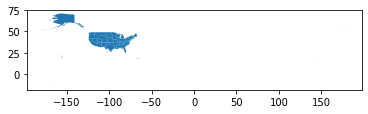

In [25]:
gdf.plot()
#scale decrease

In [26]:
mergeddf = mergeddf.merge(gdf, left_on='state', right_on='NAME')
mergeddf.head()

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,Deaths Per Capita,Death_Percentage,NAME,STUSPS,geometry
0,2020-05-01,Alabama,4903185,7294,289,0.001488,0.000059,3.962161,Alabama,AL,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,2020-05-01,Alaska,731545,362,7,0.000495,0.000010,1.933702,Alaska,AK,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ..."
2,2020-05-01,Arizona,7278717,7962,330,0.001094,0.000045,4.144687,Arizona,AZ,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,2020-05-01,Arkansas,3017804,3310,64,0.001097,0.000021,1.933535,Arkansas,AR,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
4,2020-05-01,California,39512223,52318,2147,0.001324,0.000054,4.103750,California,CA,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."


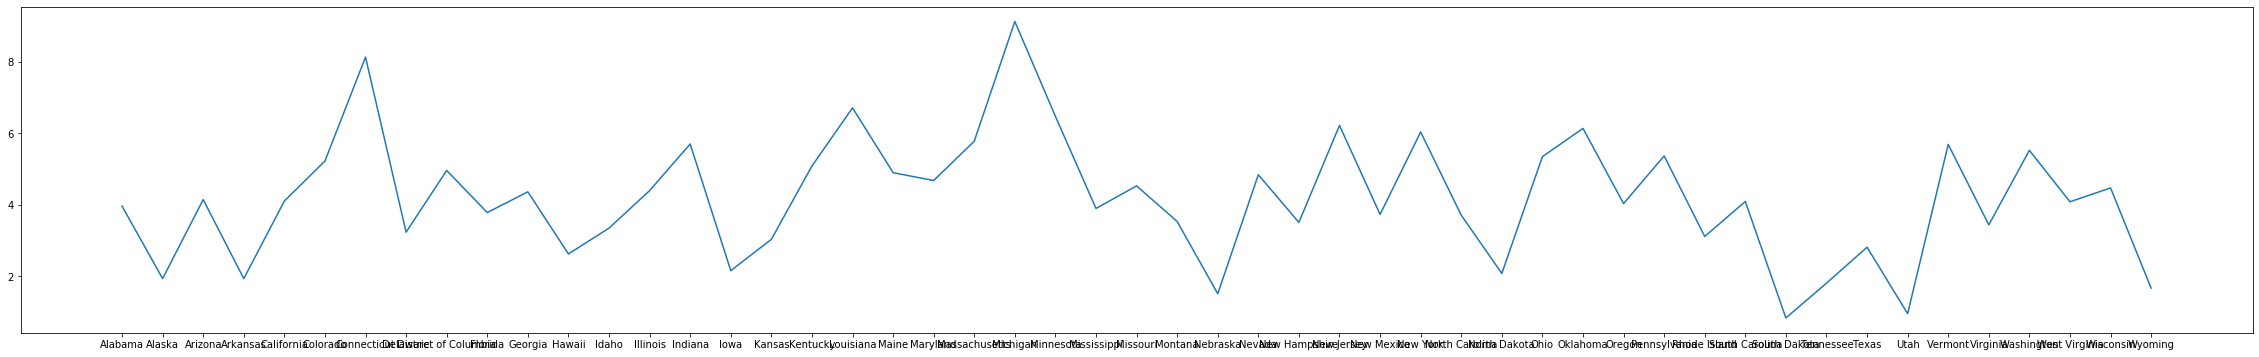

In [27]:
variable = mergeddf['Death_Percentage']
fig, ax = plt.subplots(1, figsize=(40, 6))
ax.plot(mergeddf['state'], variable)

